VOTING CLASSFIER 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_moons

In [102]:
x,y = make_moons(n_samples= 1000 , noise = 0.2)

In [103]:
df = {"x1":x[:,0]  , "x2":x[:,1]  , "y":y}   
dataset=pd.DataFrame(df)

In [104]:
dataset.head(3)

,x1,x2,y
0,0.692106,0.814165,0
1,-0.267296,1.241811,0
2,-0.506936,0.480470,0


<Axes: xlabel='x1', ylabel='x2'>

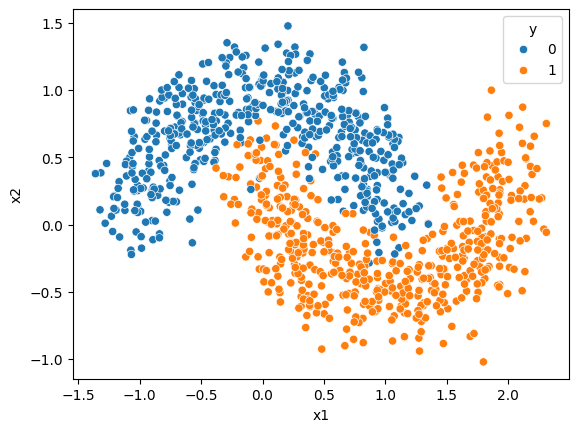

In [105]:
sns.scatterplot(x="x1" , y="x2", data=dataset ,hue="y")

In [106]:
xa = dataset.iloc[:,:-1]
ya = dataset["y"]

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train , x_test , y_train , y_test =train_test_split(xa,ya,test_size=0.2,random_state=42)

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [110]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt.score(x_train , y_train)*100  , dt.score(x_test,y_test)*100

(100.0, 94.5)

In [111]:
sv = SVC()
sv.fit(x_train , y_train)
sv.score(x_train , y_train)*100  , sv.score(x_test,y_test)*100

(97.5, 97.0)

In [112]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
gnb.score(x_train , y_train)*100  , gnb.score(x_test,y_test)*100

(87.25, 86.5)

In [113]:
from sklearn.ensemble import VotingClassifier

In [114]:
li = [("dt",DecisionTreeClassifier()) , ("sv",SVC()) , ("gnb",GaussianNB())]

In [115]:
vc = VotingClassifier(li)
vc.fit(x_train , y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('sv', SVC()),
                             ('gnb', GaussianNB())])

In [116]:
vc.score(x_test,y_test)*100 , vc.score(x_train , y_train)*100

(96.5, 98.125)

Making dataframe for comparing answers of various models and voting classifier 

In [117]:
prd = {"dt": dt.predict(x_test) , "svc": sv.predict(x_test) , "gnb": gnb.predict(x_test) , "vc": vc.predict(x_test)}

In [122]:
pd.set_option("display.max_rows" , 200)

In [123]:
df=pd.DataFrame(prd)
df

,dt,svc,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,1,1,1,1
9,1,1,1,1


VOTING REGRESSOR 

In [125]:
import pandas as pd 

In [127]:
dataset=pd.read_csv("Placement.csv")
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [128]:
x=dataset[["cgpa"]]
y=dataset["package"]

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [138]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(77.58339025733345, 77.30984312051673)

In [139]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)*100 , dtr.score(x_test,y_test)*100

(95.1559200955432, 52.19733481708333)

In [140]:
svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100 , svr.score(x_test,y_test)*100

(78.16909319813372, 75.94945442913415)

In [141]:
from sklearn.ensemble import VotingRegression

In [147]:
l =  [("lr",LinearRegression()) , ("dtr" , DecisionTreeRegressor()) , ("svr",SVR())]

In [149]:
vr = VotingRegressor(l)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dtr', DecisionTreeRegressor()), ('svr', SVR())])

In [150]:
vr.score(x_train,y_train)*100 , vr.score(x_test,y_test)*100

(87.56852979319457, 75.16568331690885)

In [152]:
prd1 = {"lr": lr.predict(x_test) , "dtr": dtr.predict(x_test) , "svr": svr.predict(x_test) , "vr": vr.predict(x_test)}

In [154]:
df1= pd.DataFrame(prd1)
df1

,lr,dtr,svr,vr
0,2.780313,2.920000,2.745462,2.815259
1,3.136352,3.252500,3.111375,3.166742
2,3.199521,2.920000,3.186923,3.102148
3,2.389819,2.540000,2.407183,2.445667
4,3.526847,3.990000,3.603909,3.706919
5,3.768035,4.110000,3.864755,3.914263
6,3.165065,3.330000,3.145318,3.213461
7,2.544868,2.235000,2.544422,2.441430
8,3.176550,3.330000,3.159083,3.221878
9,3.492392,3.140000,3.560946,3.397779
